Task 1. Predict Cars

The data file contains sample data from cars. Your target for this task is to predict the
price. The end deliverable should be a jupyter notebook. 

    • Clean, describe and visualize the data 
    • Prepare the data for modelling (train/test, encoders etc)
    • Model and evaluate, show metrics and graphs. 
    • Describe your approach at each step.

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [137]:
data_input = pd.read_csv("csv_files/Spotawheel_case_study.csv")

In [138]:
data_input.head()

,Name,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age
0,Hyundai i10 Era,60000,Petrol,Manual,2,19.81,1086,68.05,5,2650.0,9
1,Toyota Fortuner 4x2 Manual,73500,Diesel,Manual,1,13.00,2982,168.50,7,22000.0,6
2,Mercedes-Benz E-Class 230 E AT,28888,Petrol,Automatic,1,10.00,2496,157.70,5,7560.0,12
3,Volkswagen Polo Petrol Trendline 1.2L,41000,Petrol,Manual,1,16.47,1198,73.90,5,3100.0,9
4,Land Rover Range Rover Evoque 2.0 TD4 HSE Dynamic,52000,Diesel,Automatic,1,15.68,1999,177.00,5,42000.0,5


The first task that we ought to do is to see the distribution of our labels
for possible outliers that could be extracted from our training dataset.

In [139]:
labe_name = "Price"

In [140]:
len(data_input.loc[:, "Owner_Type"].unique())

4

In [141]:
len(data_input.loc[:, "Transmission"].unique())

2

In [142]:
len(data_input.loc[:, "Fuel_Type"].unique())

4

In [143]:
categorical_variables = ["Fuel_Type", "Transmission", "Owner_Type", "Seats"]
variables_names = ["Kilometers_Driven", "Mileage", "Power", "Engine", "Power", "Seats"]
encode_vars = ["Fuel_Type", "Transmission"]

<AxesSubplot:>

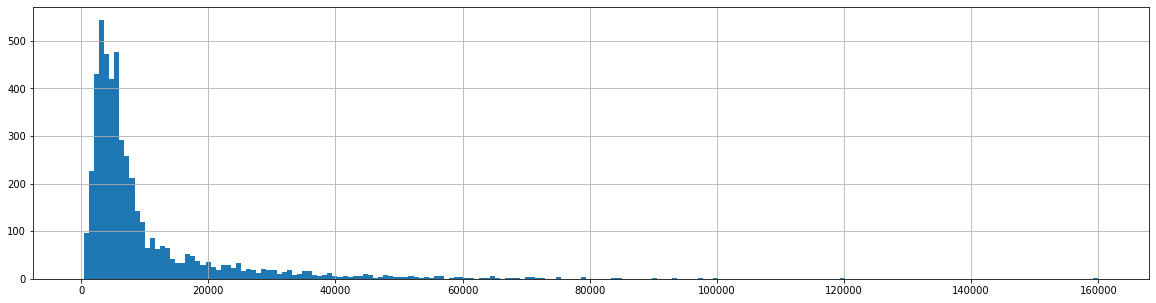

In [144]:
data_input.loc[:, "Price"].hist(figsize=(20,5), bins=200)

The distribution is obviously skewed so we it seems rather obvious that we could easily drop some obvious outliers.

In [145]:
# the unique names of the cars are
print(len(data_input["Name"].unique()))
# if there weren't so many they could actually have proven useful as a feature.
# But if we tried to use them, due to the curse of dimentionality we would definately had a serious problem with our model.

1661


The way we could actually take advantage of this feature is by extracting the actual brand of the car alone 
and check if it actually helps the model perform better

In [146]:
names = [i.lower().split(" ") for i in data_input["Name"].unique()]

In [147]:
syllabi = [j for i in names for j in i]

In [148]:
set_syllabi = set(syllabi)

In [149]:
from collections import Counter
counter_syllabi = Counter(syllabi)

In [150]:
counter_syllabi = list(counter_syllabi.items())

In [151]:
counter_syllabi = sorted([(i[-1],i[0]) for i in counter_syllabi])

In [152]:
counter_syllabi[::-1]

[(270, 'maruti'),
 (239, 'hyundai'),
 (162, 'at'),
 (140, 'honda'),
 (116, 'tdi'),
 (107, '1.2'),
 (106, 'toyota'),
 (106, 'mercedes-benz'),
 (99, 'ford'),
 (95, 'tata'),
 (95, 'diesel'),
 (94, 'mahindra'),
 (93, 'plus'),
 (89, 'mt'),
 (78, '1.6'),
 (77, 'skoda'),
 (76, 'bmw'),
 (73, 's'),
 (71, '1.5'),
 (66, 'crdi'),
 (66, '1.4'),
 (64, 'i20'),
 (63, 'volkswagen'),
 (63, 'audi'),
 (62, '2.0'),
 (59, 'option'),
 (58, 'vxi'),
 (55, 'sx'),
 (53, 'lxi'),
 (52, 'swift'),
 (50, 'series'),
 (47, 'verna'),
 (47, 'petrol'),
 (47, 'city'),
 (45, 'i10'),
 (44, 'cdi'),
 (43, 'sport'),
 (42, 'edition'),
 (40, 'rover'),
 (40, 'bsiii'),
 (39, 'vx'),
 (39, 'nissan'),
 (39, 'innova'),
 (38, 'titanium'),
 (38, 'renault'),
 (38, 'chevrolet'),
 (37, 'new'),
 (36, 'zxi'),
 (36, 'i'),
 (35, 'v'),
 (35, 'bsiv'),
 (35, 'asta'),
 (35, '200'),
 (33, 'seater'),
 (33, 'elegance'),
 (32, 'sportz'),
 (32, 'scorpio'),
 (32, 'r'),
 (32, 'magna'),
 (31, 'wagon'),
 (31, 'e-class'),
 (30, 'dzire'),
 (30, 'bs'),
 (29, '

In [153]:
# it is obvious that we could manually hand pick the brands of the cars, but since those names weren't in a sentence
# we can't do it in a non manual way (we could use NER instead).

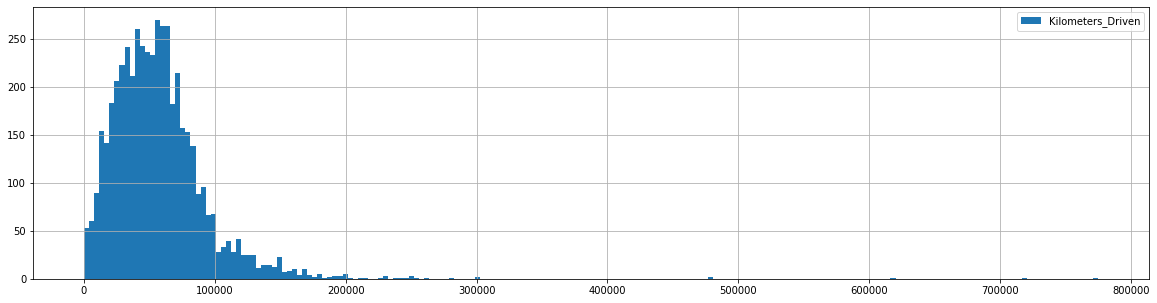

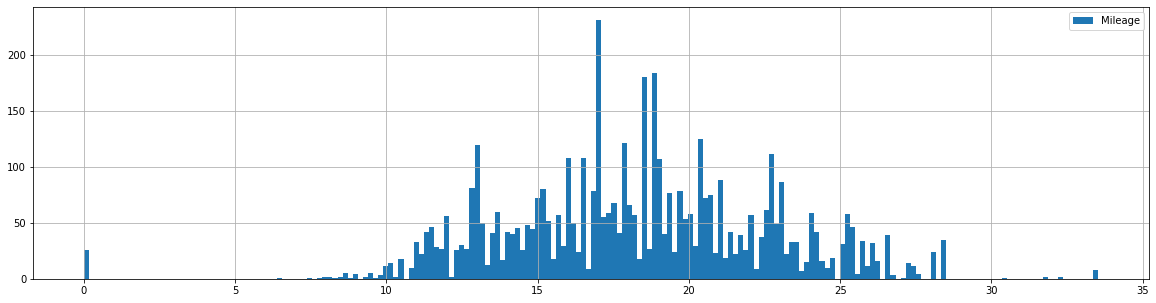

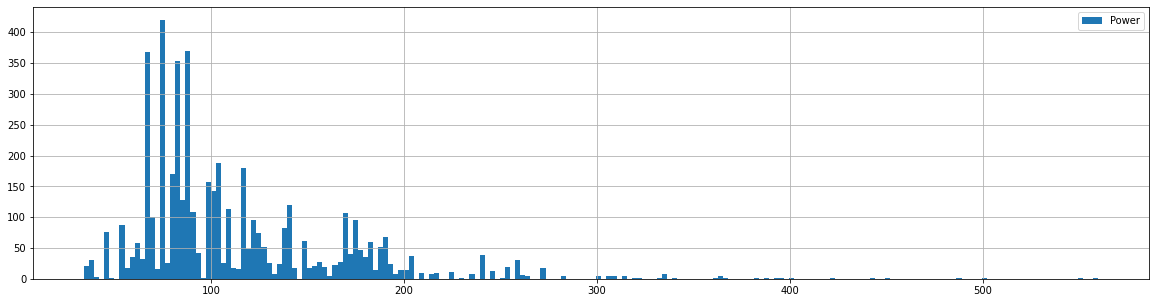

In [154]:
for i in continuous_variables:
    data_input.loc[:, i].hist(figsize=(20,5), bins=200, legend=i)
    plt.show()

Now we have to check wether there is a correlation between our features and our labels using scatter plots

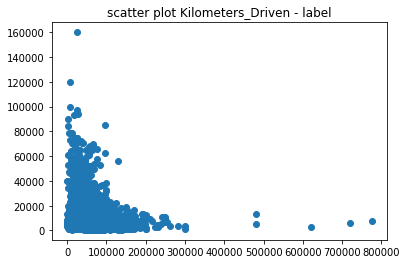

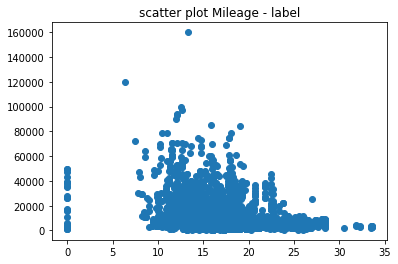

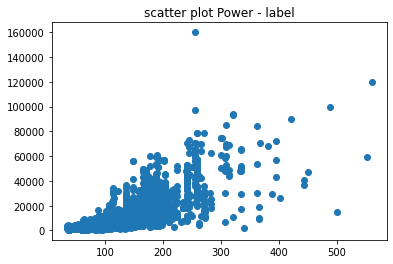

In [155]:
for i in continuous_variables:
    plt.title("scatter plot %s - label"%i)
    plt.scatter(data_input.loc[:, i].values, data_input.loc[:, labe_name].values)
#     plt.scatter(data_input.loc[:, labe_name].values, label=labe_name)
    plt.show()

There seems to be a severe correlation of Power and price

before we go any further and prepare for our model we need to encode all our categorical variables

In [156]:
data_input = data_input.loc[:, data_input.columns != "Name"]

In [157]:
data_input.loc[:, set(data_input.columns) - set(categorical_variables) -{"Price"}].describe()

,Kilometers_Driven,Engine,Power,Age,Mileage
count,4907.000000,4907.000000,4907.000000,4907.000000,4907.000000
mean,57325.883432,1621.659874,112.853436,7.545140,18.280715
std,38433.648533,599.531875,53.763071,3.185934,4.391050
min,171.000000,624.000000,34.200000,2.000000,0.000000
25%,33000.000000,1198.000000,74.980000,5.000000,15.260000
50%,53000.000000,1493.000000,94.000000,7.000000,18.200000
75%,72467.000000,1968.000000,138.100000,9.000000,21.100000
max,775000.000000,5998.000000,560.000000,23.000000,33.540000


In [158]:
# Show the correlation between the continuous data and the label. Correlation does not imply causation but we do get a very
# strong sense of the important features here

In [159]:
data_input.loc[:, set(data_input.columns) - set(categorical_variables)].corr()["Price"]

Kilometers_Driven   -0.163542
Engine               0.658710
Price                1.000000
Power                0.774266
Age                 -0.298063
Mileage             -0.338404
Name: Price, dtype: float64

In [160]:
feature_encoder = {}

for variable in categorical_variables:
    break
enc = OneHotEncoder()


In [175]:
cat_df = data_input.loc[:, categorical_variables].copy()

In [179]:
cat_df.apply(LabelEncoder().fit_transform)

,Fuel_Type,Transmission,Owner_Type,Seats
0,3,1,1,2
1,1,1,0,4
2,3,0,0,2
3,3,1,0,2
4,1,0,0,2
...,...,...,...,...
4902,1,1,1,5
4903,1,0,0,2
4904,1,0,0,4
4905,3,1,0,2


In [183]:
# 1. INSTANTIATE
enc = OneHotEncoder()

# 2. FIT
enc.fit(data_input.loc[:, categorical_variables])

# 3. Transform
onehotlabels = enc.transform(data_input.loc[:, categorical_variables]).toarray()

In [185]:
data_input.loc[:, categorical_variables]

,Fuel_Type,Transmission,Owner_Type,Seats
0,Petrol,Manual,2,5
1,Diesel,Manual,1,7
2,Petrol,Automatic,1,5
3,Petrol,Manual,1,5
4,Diesel,Automatic,1,5
...,...,...,...,...
4902,Diesel,Manual,2,8
4903,Diesel,Automatic,1,5
4904,Diesel,Automatic,1,7
4905,Petrol,Manual,1,5
